### Credit Card customers: Data cleanup and mapping

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Load and explore the data

In [25]:
df = pd.read_csv("../data/BankChurners.csv")
df.shape

(10127, 23)

#### Rename columns

In [26]:
dRenameColumns = {
    'CLIENTNUM': 'ClientID', 
    'Attrition_Flag': 'Attrited', 
    'Customer_Age': 'Age', 
    'Gender': 'Gender',
    'Dependent_count': 'DependentCount', 
    'Education_Level': 'EducationLevel', 
    'Marital_Status': 'MaritalStatus',
    'Income_Category': 'IncomeCategory', 
    'Card_Category': 'CardCategory', 
    'Months_on_book': 'RelationshipPeriod_InMonths',
    'Total_Relationship_Count': 'TotalProductNo', 
    'Months_Inactive_12_mon': 'MonthsInactive_Last12Months',
    'Contacts_Count_12_mon': 'ContactNo_Last12Months', 
    'Credit_Limit': 'CreditLimit', 
    'Total_Revolving_Bal': 'TotalRevolvingBalance_CC',
    'Avg_Open_To_Buy': 'OpenToBuyAve_Last12Months', 
    'Total_Amt_Chng_Q4_Q1': 'TransactionAmount_ChangeQ4overQ1', 
    'Total_Trans_Amt': 'TotalTransactionAmount_Last12Months',
    'Total_Trans_Ct': 'TotalTransactionCount_Last12Months', 
    'Total_Ct_Chng_Q4_Q1': 'TransactionCount_ChangeQ4overQ1', 
    'Avg_Utilization_Ratio': 'AveCardUtilizationRatio',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 'NBCAF1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 'NBCAF2'
}
df = df.rename(columns=dRenameColumns)

#### Drop some columns

In [27]:
df = df.drop(['NBCAF1', 'NBCAF2'], axis=1)

In [28]:
df.columns

Index(['ClientID', 'Attrited', 'Age', 'Gender', 'DependentCount',
       'EducationLevel', 'MaritalStatus', 'IncomeCategory', 'CardCategory',
       'RelationshipPeriod_InMonths', 'TotalProductNo',
       'MonthsInactive_Last12Months', 'ContactNo_Last12Months', 'CreditLimit',
       'TotalRevolvingBalance_CC', 'OpenToBuyAve_Last12Months',
       'TransactionAmount_ChangeQ4overQ1',
       'TotalTransactionAmount_Last12Months',
       'TotalTransactionCount_Last12Months', 'TransactionCount_ChangeQ4overQ1',
       'AveCardUtilizationRatio'],
      dtype='object')

#### Check for NULL values

In [29]:
df.isna().sum()

ClientID                               0
Attrited                               0
Age                                    0
Gender                                 0
DependentCount                         0
EducationLevel                         0
MaritalStatus                          0
IncomeCategory                         0
CardCategory                           0
RelationshipPeriod_InMonths            0
TotalProductNo                         0
MonthsInactive_Last12Months            0
ContactNo_Last12Months                 0
CreditLimit                            0
TotalRevolvingBalance_CC               0
OpenToBuyAve_Last12Months              0
TransactionAmount_ChangeQ4overQ1       0
TotalTransactionAmount_Last12Months    0
TotalTransactionCount_Last12Months     0
TransactionCount_ChangeQ4overQ1        0
AveCardUtilizationRatio                0
dtype: int64

#### Check data types

In [30]:
df.dtypes

ClientID                                 int64
Attrited                                object
Age                                      int64
Gender                                  object
DependentCount                           int64
EducationLevel                          object
MaritalStatus                           object
IncomeCategory                          object
CardCategory                            object
RelationshipPeriod_InMonths              int64
TotalProductNo                           int64
MonthsInactive_Last12Months              int64
ContactNo_Last12Months                   int64
CreditLimit                            float64
TotalRevolvingBalance_CC                 int64
OpenToBuyAve_Last12Months              float64
TransactionAmount_ChangeQ4overQ1       float64
TotalTransactionAmount_Last12Months      int64
TotalTransactionCount_Last12Months       int64
TransactionCount_ChangeQ4overQ1        float64
AveCardUtilizationRatio                float64
dtype: object

#### Explore data

In [31]:
display(df.head())

,ClientID,Attrited,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,RelationshipPeriod_InMonths,...,MonthsInactive_Last12Months,ContactNo_Last12Months,CreditLimit,TotalRevolvingBalance_CC,OpenToBuyAve_Last12Months,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##### Categorical values

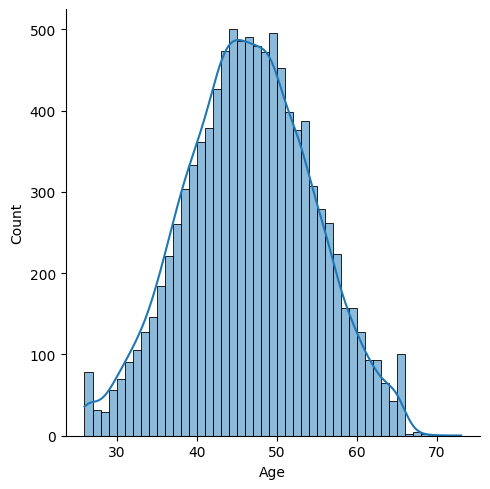

In [32]:
sns.displot(df["Age"], kde = True)
plt.show()

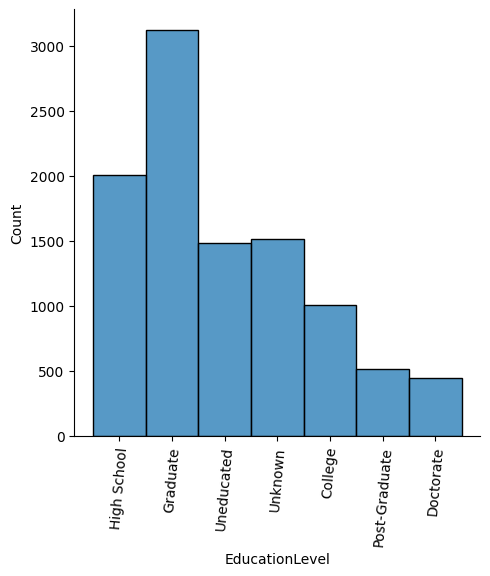

In [33]:
sns.displot(df["EducationLevel"])
plt.xticks(rotation=85)
plt.show()

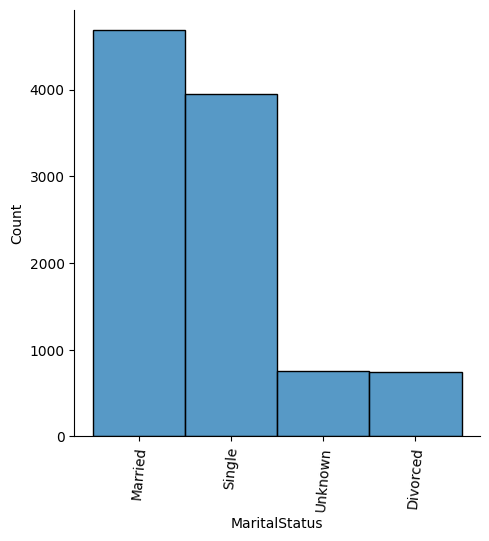

In [34]:
sns.displot(df["MaritalStatus"])
plt.xticks(rotation=85)
plt.show()

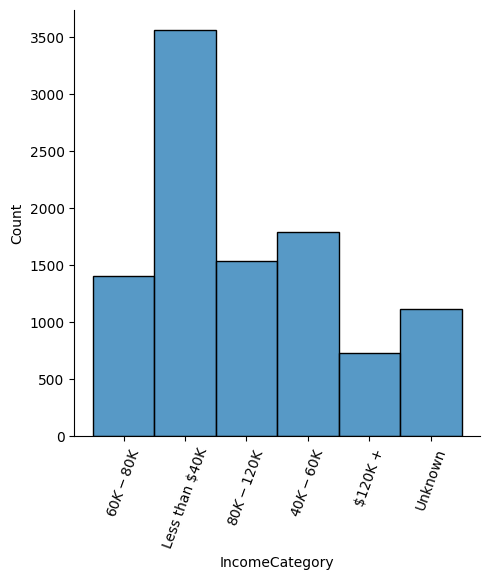

In [35]:
sns.displot(df["IncomeCategory"])
plt.xticks(rotation=70)
plt.show()

##### Map categorical values

In [36]:
categorical_values = [
    'Attrited', 'Gender', 'EducationLevel', 'MaritalStatus', 'IncomeCategory', 'CardCategory'
]
#for value in categorical_values:
#    display(df[value].unique())

In [37]:
dAttrited = {'Existing Customer': 0, 'Attrited Customer': 1}
dGender = {'M': 0, 'F': 1}
dEducationLevel = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 
                   'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
dMaritalStatus = {'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3}
dIncomeCategory = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, 
                   '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
dCardCategory = {'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}

In [38]:
df["Attrited"] = df["Attrited"].apply(lambda x: dAttrited[x])
df["Gender"] = df["Gender"].apply(lambda x: dGender[x])
df["EducationLevel"] = df["EducationLevel"].apply(lambda x: dEducationLevel[x])
df["MaritalStatus"] = df["MaritalStatus"].apply(lambda x: dMaritalStatus[x])
df["IncomeCategory"] = df["IncomeCategory"].apply(lambda x: dIncomeCategory[x])
df["CardCategory"] = df["CardCategory"].apply(lambda x: dCardCategory[x])
df.head()

,ClientID,Attrited,Age,Gender,DependentCount,EducationLevel,MaritalStatus,IncomeCategory,CardCategory,RelationshipPeriod_InMonths,...,MonthsInactive_Last12Months,ContactNo_Last12Months,CreditLimit,TotalRevolvingBalance_CC,OpenToBuyAve_Last12Months,TransactionAmount_ChangeQ4overQ1,TotalTransactionAmount_Last12Months,TotalTransactionCount_Last12Months,TransactionCount_ChangeQ4overQ1,AveCardUtilizationRatio
0,768805383,0,45,0,3,2,2,3,1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,4,1,1,1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,4,2,4,1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,1,4,2,0,1,1,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,0,3,1,2,3,1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [39]:
#for value in categorical_values:
#    display(df[value].unique())

#### Set index

In [40]:
df = df.set_index("ClientID")

#### Save cleaned and mapped CSV file

In [41]:
df.to_csv("../data/BankChurners_CleanedMapped.csv")